# 3. Exploratory Data Analysis

### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

## Steps

### 1. Categorize Columns in three Types

- **Numerical** 
- **Categorical** 
- **Mixed** 

### 2. Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Datasets/train.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis on Numerical columns
#### Age 
**conclusions**
- Age is almost normally distributed.
- Nearly 20% values are missing.
- There are some outliers but they are real values.

In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

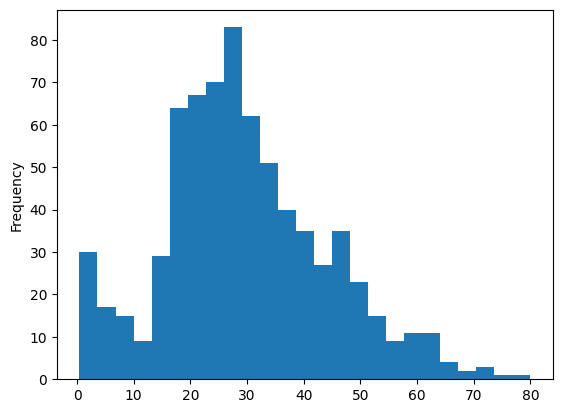

In [9]:
df['Age'].plot(kind='hist', bins=25)

<Axes: ylabel='Density'>

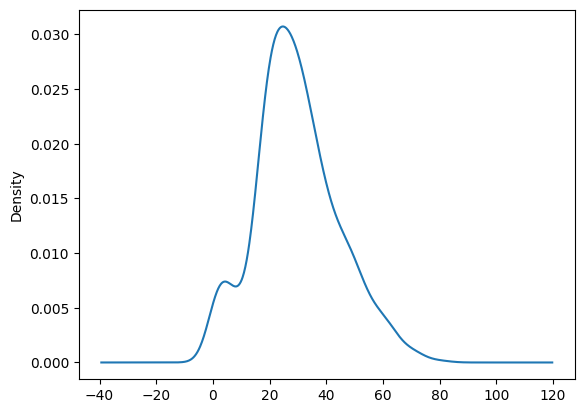

In [11]:
df['Age'].plot(kind='kde')

<Axes: >

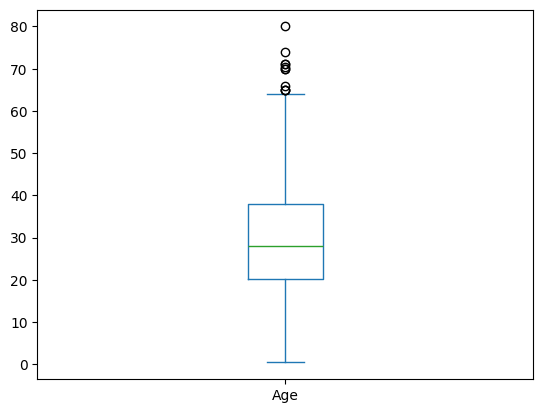

In [10]:
df['Age'].plot(kind='box')

In [12]:
df['Age'].skew()

0.38910778230082704

In [13]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [15]:
df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

#### Fare 
**conclusions**
- Fare is highly positively skewed.
- Fare col actually contains group fare not individual fare.
- we need to create new col called individual fare.

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

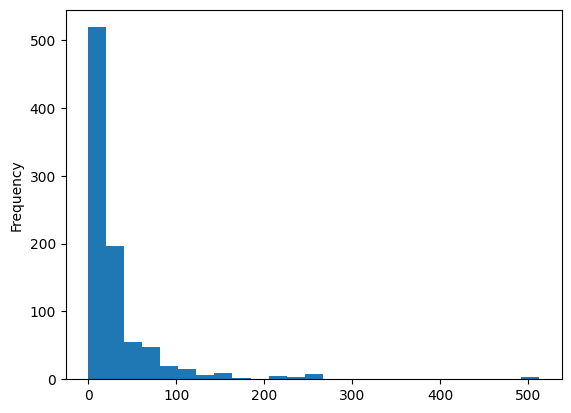

In [17]:
df['Fare'].plot(kind='hist', bins=25)

<Axes: ylabel='Density'>

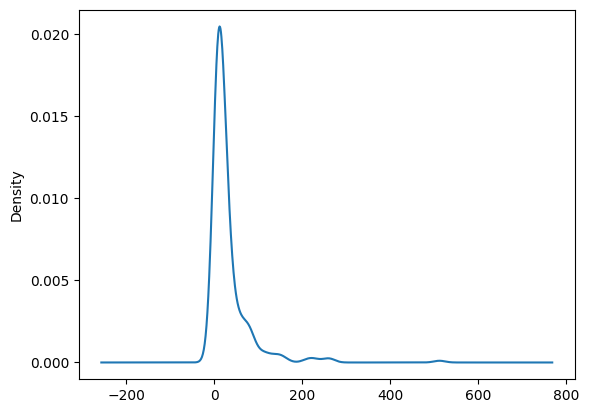

In [18]:
df['Fare'].plot(kind='kde')

In [19]:
df['Fare'].skew()

4.787316519674893

<Axes: >

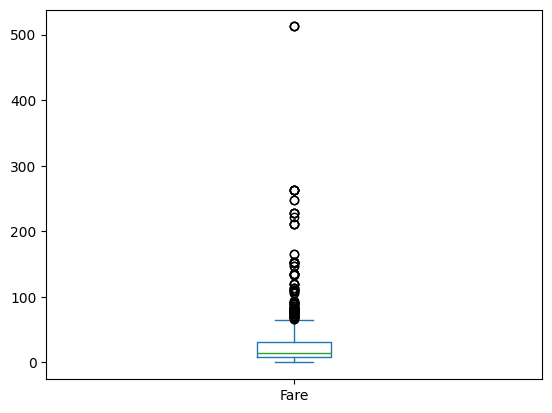

In [20]:
df['Fare'].plot(kind='box')

In [21]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [22]:
df['Fare'].isnull().sum()

0

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Survived
**conclusions**
- almost 62% passesengers lost their lives while only 38% passesenger are alive.
- there are no null values.

In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

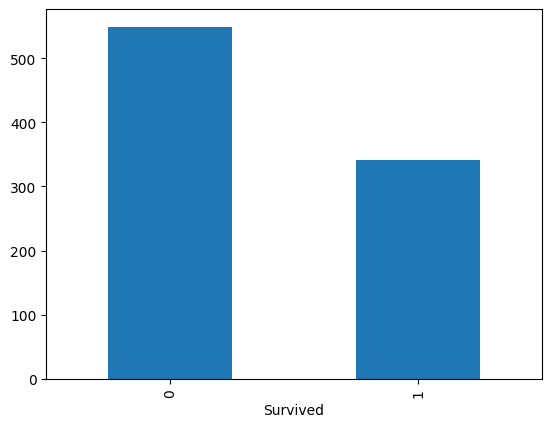

In [25]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

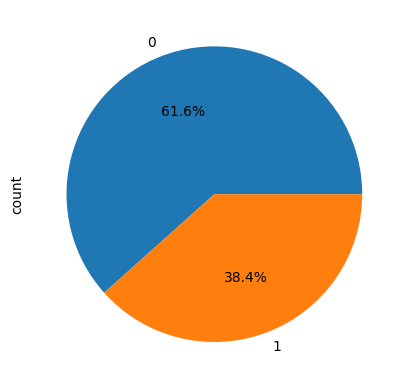

In [29]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [30]:
df['Survived'].isnull().sum()

0

### Pclass
**conclusions**
- Number of passengers in Pclass 1 is more than Pclass 2, which seems suspicious.
- Mostly num of passengers increase wrt to lower classes.

In [32]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

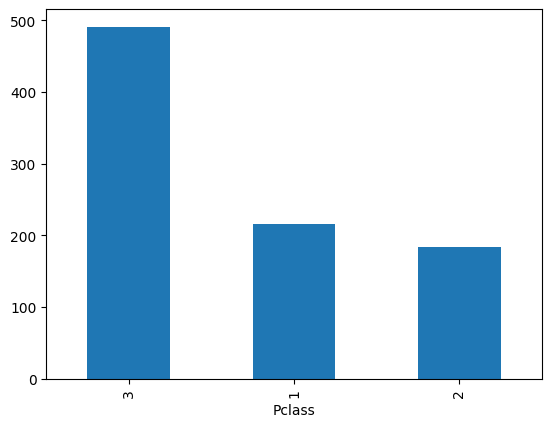

In [33]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

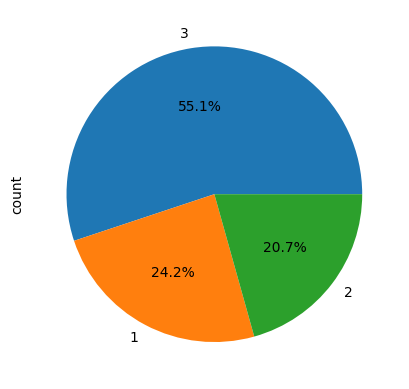

In [34]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [35]:
df['Pclass'].isnull().sum()

0

### Sex
**conclusions**
- 65% travellers are male and 35% travellers are female.

In [37]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

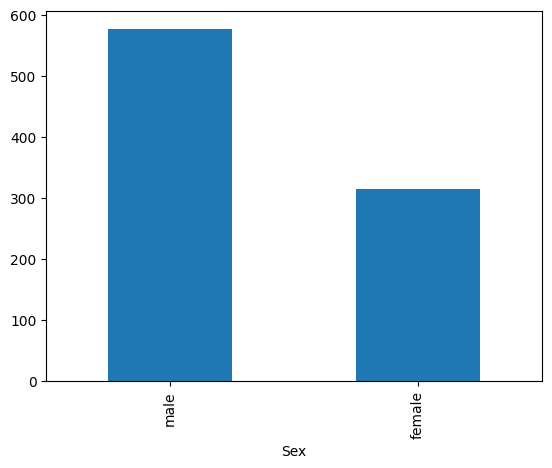

In [38]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

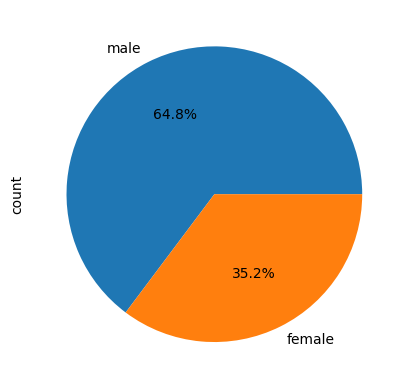

In [40]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [41]:
df['Sex'].isnull().sum()

0

### Embarked
**conclusions**
- There are 2 missing values.
- 72% peoples boarded from S
- 19% peoples boarded from C
- 9% peoples boarded from Q

In [43]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

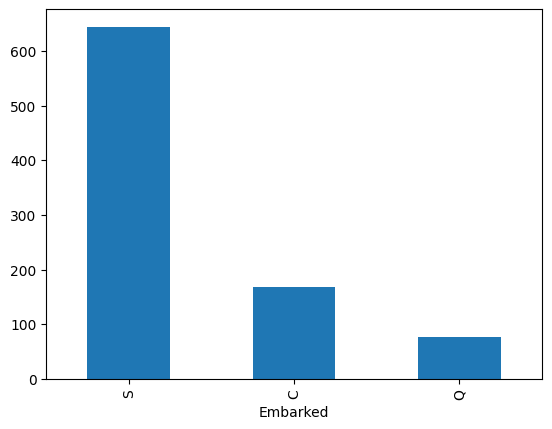

In [44]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

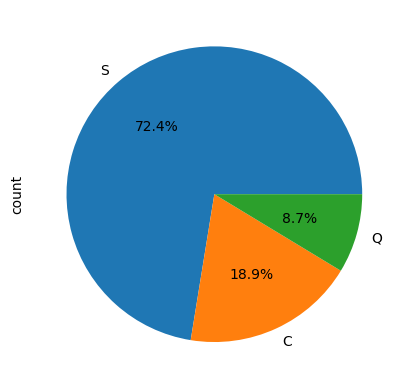

In [45]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [46]:
df['Embarked'].isnull().sum()

2

### Steps of doing Bivariate Analysis

- Select 2 cols (Generally we select that col which is most important for prediction and one by one all other cols.)
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

### Survived and Pclass
**conclusions**
- Survival is highly dependent on Pclass
- 63% passengers of Pclass 1 has survived and 37% died
- 47% passengers of Pclass 2 has survived and 53% died
- 24% passengers of Pclass 1 has survived and 76% died
- Survival declines on increasing Pclass.

In [51]:
pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

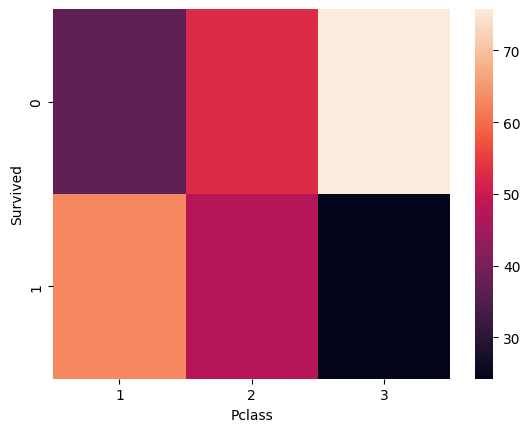

In [57]:
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100)

### Survived and Sex
**conclusions**
- Survival highly depends on Gender
- 74% females survived and 26% died.
- 19% males survived and 81% died.

In [55]:
pd.crosstab(df['Survived'], df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

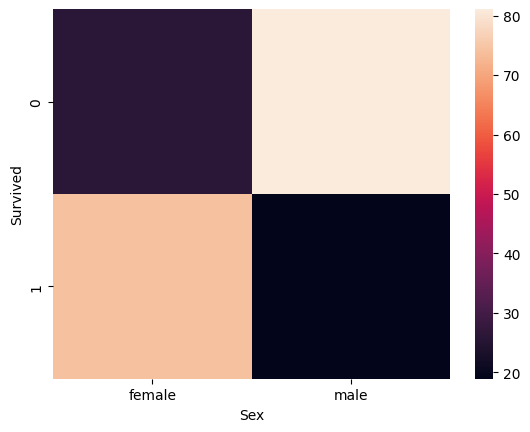

In [56]:
sns.heatmap(pd.crosstab(df['Survived'], df['Sex'], normalize='columns')*100)

### Survived and Embarked
**conclusions**
- 55% passengeers survived who boarded from C and 45% died.
- 39% passengeers survived who boarded from C and 61% died.
- 34% passengeers survived who boarded from C and 66% died.
- It is suspicious because survival shouldn't be based on boarded station but however our analysis showing that there is something hidden. It may be due to that from C station passengers are females or Pclass 1

In [61]:
pd.crosstab(df['Survived'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [65]:
pd.crosstab(df['Sex'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


 no answer to question because from Q there is also more females but their survival chances are low

In [63]:
pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


Here is the answer, above it is clear that the passengers from C are majority Pclass 1 travellers.

### Survived and Age
**conclusions**
- if the age is below 10 then survival chances are more than dying
- if age is in 20 to 35 then chances of dying is more than survival
- if age is in 35 to 40 then chances of survival are more than dying. It may be due to Pclass.

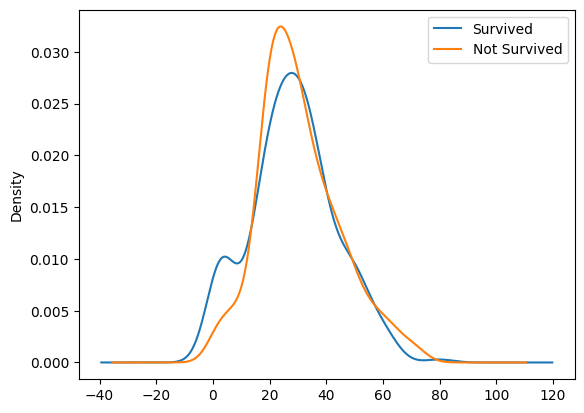

In [70]:
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Not Survived')
plt.legend()
plt.show()

In [71]:
df[df['Pclass']==1]['Age'].mean()

38.233440860215055

## Feature Engineering

Feature Engineering is the process of creating new columns from existing columns which will help in making predictions.

**conclusions**
- SibSb and Parch tells about the family or the passenges is alone so we can create new feature like family_size, family_type
- we can find individual fare based on family and Ticket

In [73]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [75]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [76]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In the above family there are total 11 members but in data there are only 7 persons, it is due to data split, because the whole titanic data is divided into two tables train.csv and test.csv

In [77]:
df1= pd.read_csv('Datasets/test2.csv')

In [79]:
df = pd.concat([df, df1])

In [80]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [81]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [82]:
69.55/11

6.322727272727272

In [83]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,6.322727


Now create family_size and family_type column  
we are considering that if the family_size is 2 to 4 then it is small family else if family_size is more than 4 then it is big family

In [84]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [85]:
def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num > 1 and num < 5:
        return 'small'
    else:
        return 'big'

In [86]:
df['family_type'] = df['family_size'].apply(transform_family_size)

Now lets perform bivariate analysis on Survived and family_type columns

### Survived and family_type
**conclusions**
- if passenger is alone than 30% chances of survival and 70% chances of dying.
- if family is small than chances of survival is 58% and 42% chances of dying.
- if family is big than chances of survival is 16% and 84% chances of dying.

In [89]:
pd.crosstab(df['Survived'], df['family_type'], normalize='columns')*100

family_type,alone,big,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


Now Lets handle name column

In [90]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [93]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [98]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [99]:
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [100]:
def categorize_title(title):
    if title in ['Mr.']:
        return 'Mr.'
    elif title in ['Ms.', 'Miss.']:
        return 'Ms.'
    elif title in ['Mrs.', 'Mme.']:
        return 'Mrs.'
    elif title in ['Master.']:
        return 'Master.'
    else:
        return 'other'

In [104]:
df['title'] = df['title'].apply(categorize_title)

### Survived and title
**conclusions**
- results are similar like gender

In [105]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Master.,Mr.,Mrs.,Ms.,other
Survived,,,,,
0.0,42.5,84.332689,20.634921,30.054645,60.0
1.0,57.5,15.667311,79.365079,69.945355,40.0


Handling Cabin column  
77% values are missing.

In [106]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [108]:
df.fillna({'Cabin':'M'}, inplace=True)

In [111]:
df['Deck'] = df['Cabin'].str[0]

In [113]:
pd.crosstab(df['Deck'], df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0
